In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_num = 0

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if (city not in cities):
        cities.append(city)
        print(f'City {city_num}: {city})
        city_num += 1

## Perform API Calls

In [12]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key
responses = []
city_name = []
city_temps = []
city_hums = []
city_clouds = []
city_winds = []
city_lats = []
city_longs = []

# Starting URL for Weather Map API Call
for city in cities:
        url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=Imperial&APPID={api_key}'
        response = requests.get(url)
        if (len(city_temps) < 500) and (response.status_code == 200):
            city_data = response.json()
            city_temps.append(city_data['main']['temp'])
            city_hums.append(city_data['main']['humidity'])
            city_clouds.append(city_data['clouds']['all'])
            city_winds.append(city_data['wind']['speed']) 
            city_lats.append(city_data['coord']['lat'])
            city_longs.append(city_data['coord']['lon'])
            time.sleep(1)
len(city_temps)

500

In [31]:
#Build DataFrame to hold Temperature, Humidity, Cloudiness, and Wind Speed
df = pd.DataFrame()
df['Temperature'] = city_temps
df['Humidity'] = city_hums
df['Cloudiness'] = city_clouds
df['Wind Speed'] = city_winds
df['Latitude'] = city_lats
df['Longitude'] = city_longs
df.to_csv('Weather Data.csv')

Text(0,0.5,'Temperature')

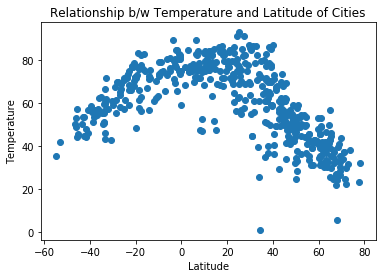

In [26]:
templat_plot = plt.scatter(x=df['Latitude'], y=df['Temperature'])
plt.title('Relationship b/w Temperature and Latitude of Cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

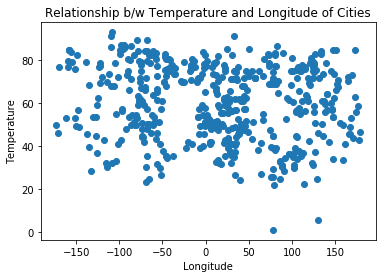

In [35]:
#Just for comparison
templong_plot = plt.scatter(x=df['Longitude'], y=df['Temperature'])
plt.title('Relationship b/w Temperature and Longitude of Cities')
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.savefig('Temp_to_Lat.png')
plt.show()

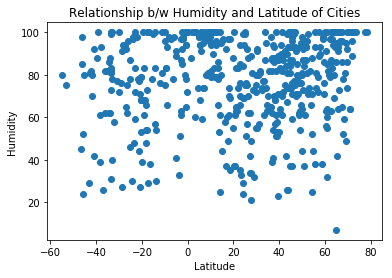

In [36]:
hum_plot = plt.scatter(x=df['Latitude'], y=df['Humidity'])
plt.title('Relationship b/w Humidity and Latitude of Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Hum_to_Lat.png')
plt.show()

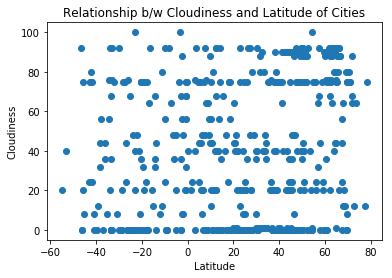

In [37]:
cloud_plot = plt.scatter(x=df['Latitude'], y=df['Cloudiness'])
plt.title('Relationship b/w Cloudiness and Latitude of Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Cloud_to_Lat.png')
plt.show()

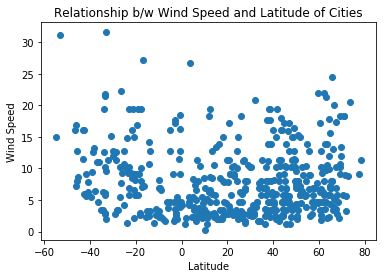

In [38]:
wind_plot = plt.scatter(x=df['Latitude'], y=df['Wind Speed'])
plt.title('Relationship b/w Wind Speed and Latitude of Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Wind_to_Lat.png')
plt.show()